 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_path = Path("/FinTech_Activities/FinTech-Course/Homework/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [3]:
# Count nulls
whale_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [4]:
# Drop nulls
whale_df = whale_df.dropna().copy()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_path = Path("/FinTech_Activities/FinTech-Course/Homework/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [6]:
# Count nulls
algo_df.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [7]:
# Drop nulls
algo_df = algo_df.dropna().copy()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path("/FinTech_Activities/FinTech-Course/Homework/Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [9]:
# Drop nulls
sp_tsx_df.isnull().mean() * 100

Close    0.0
dtype: float64

In [10]:
# Fix Data Types
#Removing the '$' in the SP TSX df
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")

#Removing the ',' so then the df can be turned into a float
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "").astype(float)

D:\Anaconda\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# Calculate Daily Returns
sp_tsx_df = sp_tsx_df.pct_change()

In [12]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_df.columns = ["S&P TSX 60"]

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [13]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp_tsx_df], axis="columns", join="inner")

#Sorting the dataframe from the earliest date to the latest
combined_df = combined_df.sort_index()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of all Portfolios'}, xlabel='Date'>

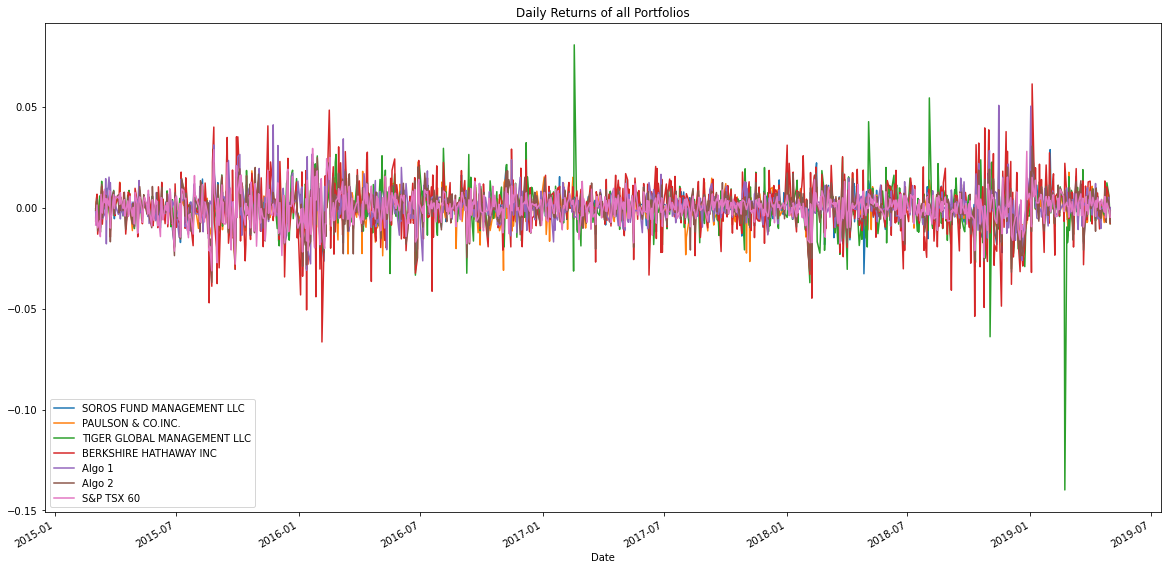

In [50]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title="Daily Returns of all Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios'}, xlabel='Date'>

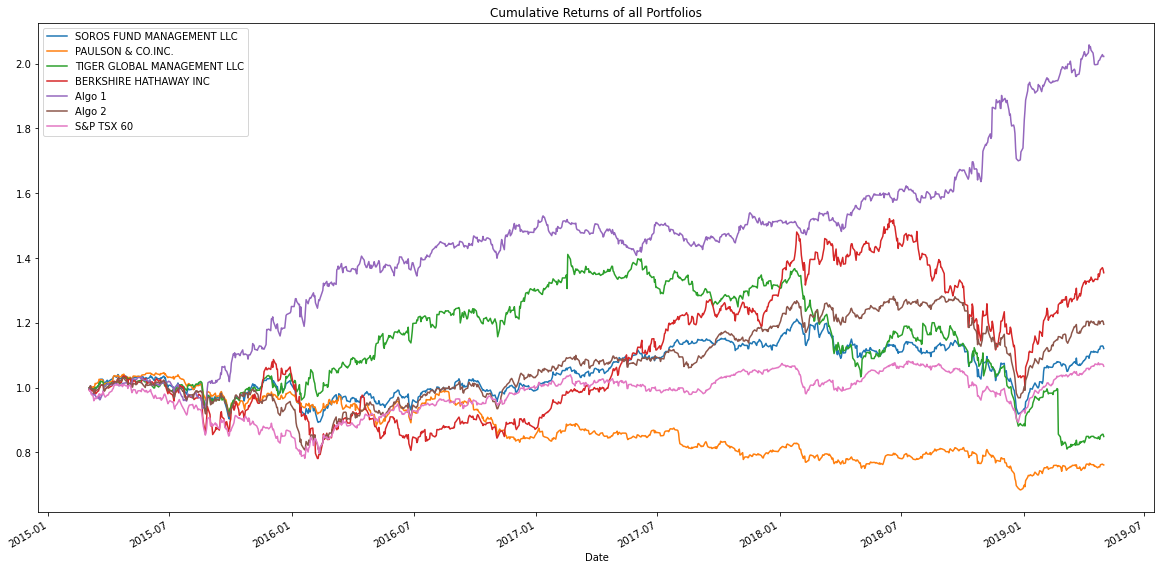

In [48]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns of all Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk Box Plots'}>

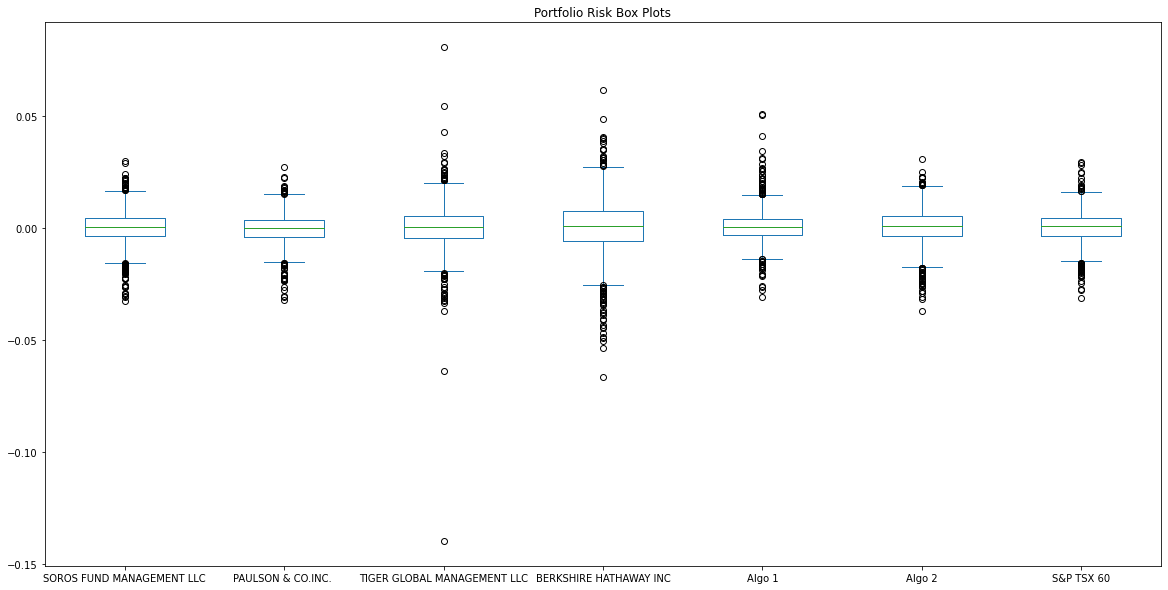

In [49]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20, 10), title="Portfolio Risk Box Plots")

### Calculate Standard Deviations

In [17]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = combined_df.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [18]:
# Calculate  the daily standard deviation of S&P TSX 60
sptsx_60_std = all_portfolio_std["S&P TSX 60"]
# Determine which portfolios are riskier than the S&P TSX 60
all_portfolio_std > sptsx_60_std

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX 60                     False
dtype: bool

### Calculate the Annualized Standard Deviation

In [19]:
# Calculate the annualized standard deviation (252 trading days)
annulised_std = all_portfolio_std * np.sqrt(252)
annulised_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Whale Portfolios STD Compared to the S&P TSX 60'}, xlabel='Date'>

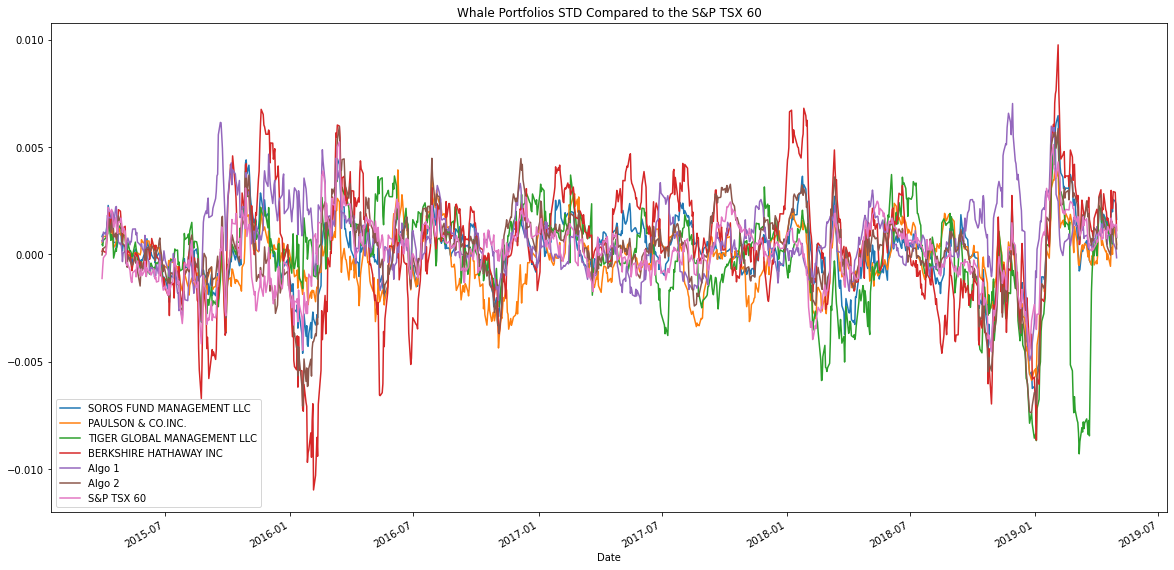

In [58]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_std_21 = combined_df.rolling(window=21).mean()
# Plot the rolling standard deviation
all_std_21.plot(figsize=(20,10), title="Whale Portfolios STD Compared to the S&P TSX 60")

### Calculate and plot the correlation

In [59]:
# Calculate the correlation
correlation = combined_df.corr()
# Display the correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [22]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_df["Algo 1"].cov(combined_df["S&P TSX 60"])
# Calculate variance of S&P TSX
variance = combined_df["S&P TSX 60"].var()
# Computing beta
algo1_beta = algo1_covariance / variance
# Plot beta trend
print(f"Algo 1 Beta: {algo1_beta}")

Algo 1 Beta: 0.33474459081856844


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [23]:
# Use `ewm` to calculate the rolling window
all_ewm_21 = combined_df.ewm(halflife=21).mean()
all_ewm_21

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.005908
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.003410
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005133
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.005436
...,...,...,...,...,...,...,...
2019-04-25,0.001277,0.000032,-0.001058,0.001860,0.000625,0.000876,0.001018
2019-04-26,0.001500,0.000329,-0.000622,0.002138,0.000702,0.001018,0.001058
2019-04-29,0.001492,0.000406,-0.000399,0.002238,0.000848,0.001077,0.000998


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [24]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (all_portfolio_std * np.sqrt(252))

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

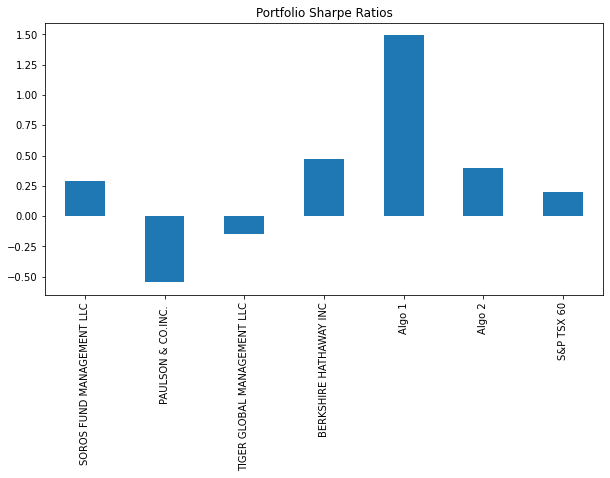

In [54]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(10,5), title="Portfolio Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Yes both of the algorithmic strategies outperform the S&P TSX 60 and all of the whale portfolios except Algo 2 didn't outperform Berkshire Hathaway Inc. Thi can be seen through the positive sharpe ratio in the bar chart above

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [26]:
# Reading data from 1st stock
tsla_path = Path("/FinTech_Activities/FinTech-Course/Homework/Resources/TSLA.csv")
tsla_df = pd.read_csv(tsla_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [27]:
# Reading data from 2nd stock
msft_path = Path("/FinTech_Activities/FinTech-Course/Homework/Resources/MSFT2.csv")
msft_df = pd.read_csv(msft_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [28]:
# Reading data from 3rd stock
googl_path = Path("/FinTech_Activities/FinTech-Course/Homework/Resources/GOOGL.csv")
googl_df = pd.read_csv(googl_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [29]:
# Combine all stocks in a single DataFrame
myportfolio_df = pd.concat([tsla_df, msft_df, googl_df], axis="columns", join="inner")
myportfolio_df

,Close,Close,Close
Date,,,
2014-01-02,10.01,37.16,27.83
2014-01-03,9.97,36.91,27.63
2014-01-06,9.80,36.13,27.93
2014-01-07,9.96,36.41,28.47
2014-01-08,10.09,35.76,28.53
...,...,...,...
2017-12-22,21.68,85.51,53.44
2017-12-26,21.15,85.40,53.29
2017-12-27,20.78,85.71,53.01


In [30]:
#Reset Date Index

#Didn't need to do this as I already made the index the same while making the csv file in Google Sheets

In [31]:
# Reorganize portfolio data by having a column per symbol
myportfolio_df.columns = ["TSLA", "MSFT", "GOOGL"]

In [32]:
# Calculate daily returns
myportfolio_df = myportfolio_df.pct_change()
# Drop NAs
myportfolio_df = myportfolio_df.dropna()
# Display sample data
myportfolio_df.head()

,TSLA,MSFT,GOOGL
Date,,,
2014-01-03,-0.003996,-0.006728,-0.007186
2014-01-06,-0.017051,-0.021132,0.010858
2014-01-07,0.016327,0.007750,0.019334
2014-01-08,0.013052,-0.017852,0.002107
2014-01-09,-0.024777,-0.006432,-0.009464


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
myportfolio_returns = myportfolio_df.dot(weights)

# Display sample data
myportfolio_returns.head()

Date
2014-01-03   -0.005970
2014-01-06   -0.009109
2014-01-07    0.014470
2014-01-08   -0.000898
2014-01-09   -0.013557
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
all_returns_df = pd.concat([combined_df, myportfolio_returns], axis="columns", join="inner")

#Renaming the last column to tell it is my portfolio
all_returns_df.columns = [*all_returns_df.columns[:-1], 'My Portfolio']
all_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.001191
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.003088
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.000847
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.021826
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.000602
...,...,...,...,...,...,...,...,...
2017-12-21,0.013779,0.007403,0.006315,0.011280,0.008844,0.003091,0.001421,0.001789
2017-12-22,0.000544,-0.003964,0.003543,0.000607,-0.000844,0.000511,-0.001073,-0.007066
2017-12-27,-0.003361,-0.000916,-0.001548,0.000239,0.001046,-0.000624,0.002342,-0.006373


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns_df.isnull().mean() * 100

all_returns_df = all_returns_df.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
all_returns_std = all_returns_df.std()
all_annulised_std = all_returns_std * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling STD of all Portfolios'}, xlabel='Date'>

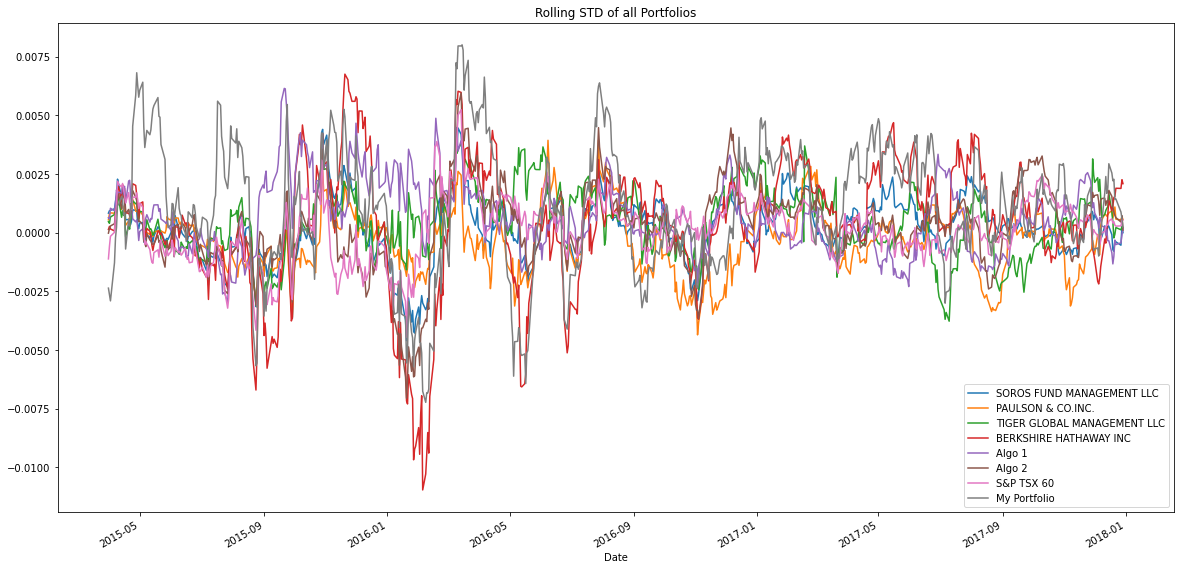

In [51]:
# Calculate rolling standard deviation
all_returns_std_21 = all_returns_df.rolling(window=21).mean()
# Plot the rolling standard deviation
all_returns_std_21.plot(title="Rolling STD of all Portfolios", figsize=(20,10))

### Calculate and plot the correlation

In [38]:
# Calculate and plot the correlation
allr_correlation = all_returns_df.corr()
allr_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.658830,0.599785,0.726292,0.324062,0.826677,0.687683,0.589006
PAULSON & CO.INC.,0.658830,1.000000,0.374884,0.475248,0.240634,0.607630,0.432162,0.403135
TIGER GLOBAL MANAGEMENT LLC,0.599785,0.374884,1.000000,0.467158,0.191546,0.540382,0.471939,0.496085
BERKSHIRE HATHAWAY INC,0.726292,0.475248,0.467158,1.000000,0.289481,0.625282,0.523667,0.621225
Algo 1,0.324062,0.240634,0.191546,0.289481,1.000000,0.268837,0.321739,0.219127
Algo 2,0.826677,0.607630,0.540382,0.625282,0.268837,1.000000,0.736067,0.546268
S&P TSX 60,0.687683,0.432162,0.471939,0.523667,0.321739,0.736067,1.000000,0.473909
My Portfolio,0.589006,0.403135,0.496085,0.621225,0.219127,0.546268,0.473909,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling Beta of My Custom Portfolio'}, xlabel='Date'>

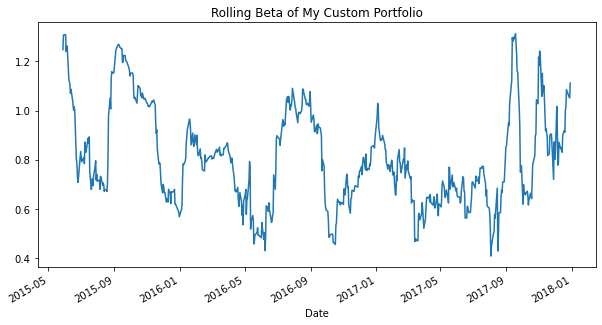

In [55]:
# Calculate rolling covariance of my portfolio
myportfolio_r_covariance = all_returns_df["My Portfolio"].rolling(window=60).cov(all_returns_df["S&P TSX 60"])

# Calculate rolling variance of S&P TSX
rolling_variance = all_returns_df["S&P TSX 60"].rolling(window=60).var()

# Computing rolling beta
myportfolio_r_beta = myportfolio_r_covariance / rolling_variance

# Plot rolling beta trend
myportfolio_r_beta.plot(title="Rolling Beta of My Custom Portfolio", figsize=(10,5))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualized Sharpe Ratios
annual_sharpe_ratios = (all_returns_df.mean() * 252) / (all_returns_std * np.sqrt(252))

<AxesSubplot:title={'center':"Custom Portfolio's Sharpe Ratio Compared to the rest"}>

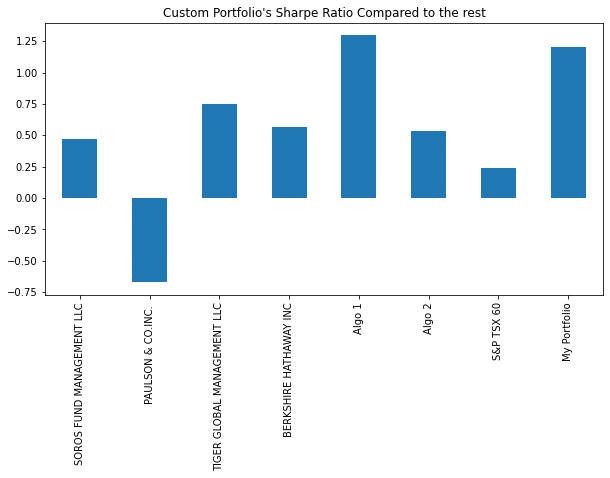

In [56]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratios.plot.bar(figsize=(10,5), title="Custom Portfolio's Sharpe Ratio Compared to the rest")

### How does your portfolio do?

My portfolio would've exceeded the S&P TSX 60 by a long way and was only beaten by the Algo 1 portfolio during the specific time period as shown by the positive sharpe ratios shown in the bar chart above